<a href="https://colab.research.google.com/github/elizamelo/LabFis04/blob/main/LabFis4Espectroscopia_Turmas2e32023_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import numpy as np
import pandas as pd
import math
import matplotlib as mpl
import matplotlib.pyplot as plt

Laboratório de Física IV Prática 08 -09 : Espectrocopia I e II

In [93]:
#!curl -o espectroscopio1.xlsx https://raw.githubusercontent.com/LabFis04/main/Grupos/espectroscopio1.xlsx

In [94]:
#!ls -lah
     

In [95]:
# Fonte - ex.: Mercurio - Hg
Theta_ref1 =176 #graus - espectroscopio 1
Theta_ref2 =347 #graus - espectroscopio 2
Theta_ref3 =256 #graus - espectroscopio 3


In [96]:
#Alinhamento
x_d_1=168.5
x_e_1=183.3

x_d_2=339.7
x_e_2=354.4

x_d_3=263.5
x_e_3=248.6

theta_i_d_1 = abs(Theta_ref1-x_d_1)
theta_i_e_1 = abs(Theta_ref1-x_e_1)
a_esp1=abs(theta_i_d_1-theta_i_e_1)
print("theta_i_d_1:", theta_i_d_1,"; ","theta_i_e_1:",  np.round(theta_i_e_1,1),"; ","Alinhamento do Esp. 1:",  np.round(a_esp1, 2 ),".")

theta_i_d_2 = abs(Theta_ref2-x_d_2)
theta_i_e_2 = abs(Theta_ref2-x_e_2)
a_esp2=abs(theta_i_d_2-theta_i_e_2)
print("theta_i_d_2:", np.round(theta_i_d_2,1),"; ","theta_i_e_2:",  np.round(theta_i_e_2,1),"; ","Alinhamento do Esp. 2:",  np.round(a_esp2, 2 ),".")

theta_i_d_3 = abs(Theta_ref3-x_d_3)
theta_i_e_3 = abs(Theta_ref3-x_e_3)
a_esp3=abs(theta_i_d_3-theta_i_e_3)
print("theta_i_d_3:", theta_i_d_3,"; ","theta_i_e_3:", np.round(theta_i_e_3,1),"; ","Alinhamento do Esp. 3:",  np.round(a_esp3, 2 ),".")

theta_i_d_1: 7.5 ;  theta_i_e_1: 7.3 ;  Alinhamento do Esp. 1: 0.2 .
theta_i_d_2: 7.3 ;  theta_i_e_2: 7.4 ;  Alinhamento do Esp. 2: 0.1 .
theta_i_d_3: 7.5 ;  theta_i_e_3: 7.4 ;  Alinhamento do Esp. 3: 0.1 .


In [97]:
#dataset = pd.read_excel("espectroscopio1.xlsx", sheet_name="Sheet1", usecols=[0,1,2], nrows=8, index_col=0, names=["Índice", "X", "Y"] ) #importação dos dados 
!curl -o espectroscopio123turma3-g1.csv https://raw.githubusercontent.com/elizamelo/LabFis04/main/Grupos/espectroscopio123%20-%20turma3-g1.csv
#dataset = pd.read_excel("espectroscopio123turma3-g1.csv" ) #importação dos dados 


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   223  100   223    0     0   1304      0 --:--:-- --:--:-- --:--:--  1304


In [98]:


dataset = pd.read_csv( "espectroscopio123turma3-g1.csv", usecols=[0,1,2], nrows=10,skiprows=1, na_values=["0"],names=["A", "X", "Y"] )
dataset
     


,A,X,Y
0,7.4,0.128796,4358.3
1,7.7,0.133986,4471.0
2,8.7,0.151261,5015.0
3,9.3,0.161604,5460.7
4,10.0,0.173648,5769.6
5,10.1,0.175367,5790.7
6,10.3,0.178802,5876.0
7,11.7,0.202787,6678.0
8,12.3,0.213030,7065.0


In [99]:
dataset.dtypes

A    float64
X    float64
Y    float64
dtype: object

In [100]:
dataset['X'] = pd.to_numeric(dataset['X'], errors='coerce')
dataset['Y'] = pd.to_numeric(dataset['Y'], errors='coerce')

dataset.dtypes

A    float64
X    float64
Y    float64
dtype: object

In [101]:

#xdata=dataset['X'] # sen(theta)
#ydata=dataset['Y'] # Comprimento de onda (Angtrom)
x = dataset[ "X" ] # sen(theta)
x

0    0.128796
1    0.133986
2    0.151261
3    0.161604
4    0.173648
5    0.175367
6    0.178802
7    0.202787
8    0.213030
Name: X, dtype: float64

In [102]:
y = dataset[ "Y" ] #Comprimento de onda em Angstrom
y

0    4358.3
1    4471.0
2    5015.0
3    5460.7
4    5769.6
5    5790.7
6    5876.0
7    6678.0
8    7065.0
Name: Y, dtype: float64

In [103]:
from scipy.optimize import curve_fit

def pol1(x, p0, p1):
   return p0 + p1*x

     


In [104]:
popt_lin, pcov_lin = curve_fit( pol1, x, y, p0=(0.,0.) )
print ( popt_lin, pcov_lin )

[  204.4770619  32017.77635221] [[  9629.50379944 -55644.38033701]
 [-55644.38033701 329629.18638844]]


In [122]:
print ( "Coeficiente m' (m): {}".format( popt_lin[ 1 ] ) )
print ( "Incerteza padrão coeficiente m (m): {}".format( np.sqrt( pcov_lin[ 1, 1 ] ) ) )
print ( "a = {:.2f} ± {:.2f} (m)".format( np.round( popt_lin[ 1 ], 2 ), np.round( np.sqrt( pcov_lin[ 1, 1 ] ), 2 ) ) )

Coeficiente m' (m): 32017.776352206758
Incerteza padrão coeficiente m (m): 574.1334221140937
a = 32017.78 ± 574.13 (m)


In [123]:
print ( "Coeficiente b (m): {}".format( popt_lin[ 0 ] ) )
print ( "Incerteza padrão coeficiente b (m): {}".format( np.sqrt( pcov_lin[ 0, 0 ] ) ) )
print ( "{} ± {} (m)".format( np.round( popt_lin[ 0 ], 2 ), np.round( np.sqrt( pcov_lin[ 0, 0 ] ), 2 ) ) )

Coeficiente b (m): 204.47706189587214
Incerteza padrão coeficiente b (m): 98.13003515456883
204.48 ± 98.13 (m)


Text(0.4, 0.85, '$b = 204.48 \\pm 98.13\\,\\left(\\rm{m}\\right)$')

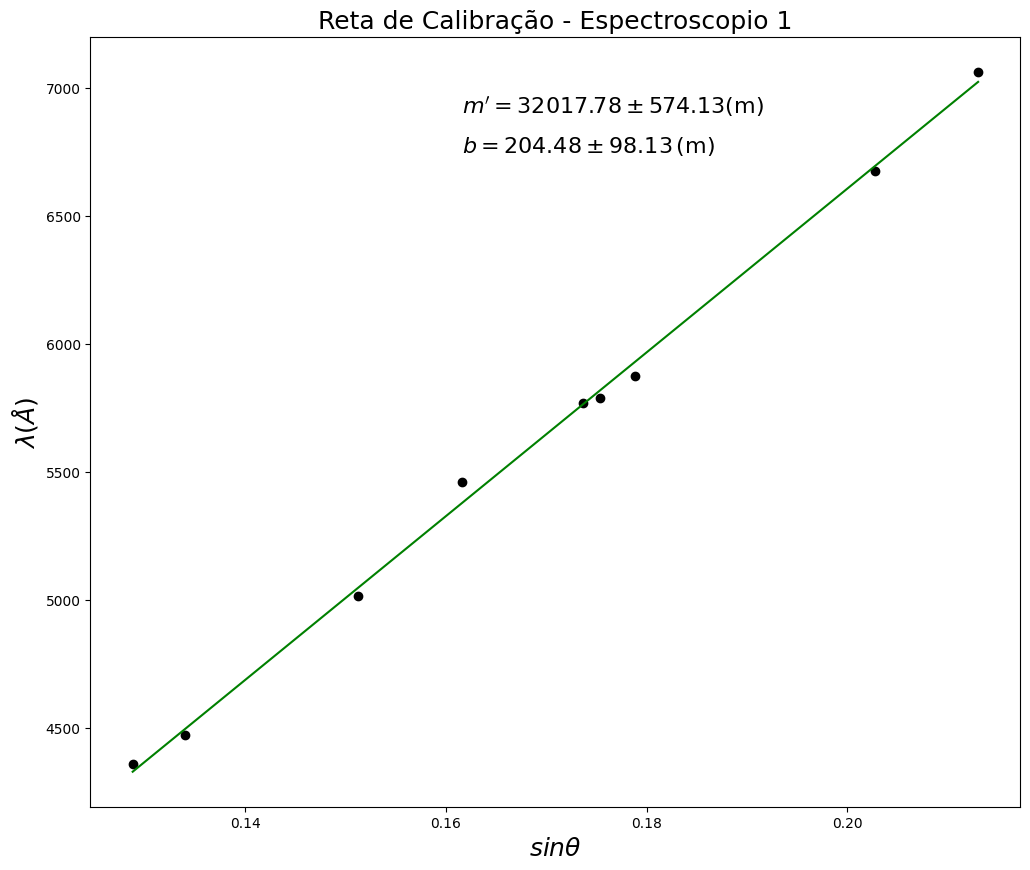

In [128]:
fig = plt.figure( figsize=(12,10) )

plt.plot( x, y, 'ko' )
plt.plot( x, ( popt_lin[ 0 ]  + popt_lin[ 1 ] * x ), '-g' )
plt.xlabel( r"$sin\theta$", fontsize=18)
plt.ylabel( r"$\lambda(\AA)$", fontsize=18 )
plt.title('Reta de Calibração - Espectroscopio 1', fontsize=18)

plt.text( 0.4, 0.9,
          r"$m' = {} \pm {}(\rm{{m}})$".format( np.round( popt_lin[ 1 ], 2 ), np.round( np.sqrt( pcov_lin[ 1, 1 ] ), 2 ) ),
          fontsize=16, transform=plt.gca().transAxes )
plt.text( 0.4, 0.85,
          r"$b = {} \pm {}\,\left(\rm{{m}}\right)$".format( np.round( popt_lin[ 0 ], 2 ), np.round( np.sqrt( pcov_lin[ 0, 0 ] ), 2 ) ),
          fontsize=16, transform=plt.gca().transAxes )

In [129]:
d=1e-3/300 #m
d

3.3333333333333333e-06

In [133]:
coefa=popt_lin[ 1 ] #Angstrom
coefa*1e-10

3.201777635220676e-06

In [140]:
D= np.abs(d-(coefa*1e-10))/(np.sqrt( pcov_lin[ 1, 1 ]*1e-10))
D

2.291378502722213e-05

Lâmpada de Hidrogênio - espectro visível

Determinar a constante de Rydberg

d=1e-3/300 m

m=1

lambda=d/m *sen(theta)

In [109]:
R_H=1.097e-3 #A
R_H

0.001097

In [110]:
d=1e-3/300 #m
d

3.3333333333333333e-06

In [111]:
thetag_1=7.4 #violeta 2
thetag_2=8.5 #azul-esverdeada
thetag_3=11.3 #vermelha
print("\u03B8_1 =", thetag_1,"\u00B0")
print("\u03B8_2 =", thetag_2,"\u00B0")
print("\u03B8_3 =", thetag_3,"\u00B0")

θ_1 = 7.4 °
θ_2 = 8.5 °
θ_3 = 11.3 °


In [112]:
thetar_1= np.deg2rad(thetag_1)#violeta 2
thetar_2= np.deg2rad(thetag_2) #azul-esverdeada
thetar_3= np.deg2rad(thetag_3) #vermelha
print("\u03B8_1 =", thetar_1,"rad")
print("\u03B8_2 =", thetar_2,"rad")
print("\u03B8_3 =", thetar_3,"rad")

θ_1 = 0.1291543646475804 rad
θ_2 = 0.14835298641951802 rad
θ_3 = 0.19722220547535926 rad


In [113]:
or1=((np.sin(thetar_1)) )
or2=((np.sin(thetar_2)) )
or3=((np.sin(thetar_3)) )
print("sen\u03B8_1 =",or1 ,"rad")
print("sen\u03B8_2 =",or2 ,"rad")
print("sen\u03B8_3 =",or3 ,"rad")
o1=np.rad2deg(or1)
o2=np.rad2deg(or2)
o3=np.rad2deg(or3)
print("\u03B8_1 =", o1,"\u00B0")
print("\u03B8_2 =", o2,"\u00B0")
print("\u03B8_3 =", o3,"\u00B0")




senθ_1 = 0.1287955965775628 rad
senθ_2 = 0.14780941112961063 rad
senθ_3 = 0.19594614424251772 rad
θ_1 = 7.379444103763937 °
θ_2 = 8.468855430040707 °
θ_3 = 11.22688707695792 °


In [114]:
l_1=(d * or1)
l_1

4.2931865525854265e-07

In [115]:
l_2=(d * or2)
l_2

4.926980370987021e-07

In [116]:
l_3=(d * or3)
l_3

6.531538141417257e-07

In [117]:
y1=1/l_1
y2=1/l_2
y3=1/l_3
print(y1,";",y2,";",y3,";")

2329272.179886485 ; 2029640.7225175735 ; 1531032.9333589613 ;


In [118]:
x1=(1/4)-(1/25)
x2=(1/4)-(1/16)
x3=(1/4)-(1/9)
print(x1,";",x2,";",x3,";")

0.21 ; 0.1875 ; 0.1388888888888889 ;


In [119]:
x_h=np.array([x1,x2,x3]) # sen(theta)
y_h=np.array([y1,y2,y3] )# Comprimento de onda (Angtrom)

In [120]:
xhbar = np.mean(x_h) # cálculo da média de x_h
yhbar = np.mean(y_h)  # cálculo da média de y_h


a_h = np.sum(x_h*(y_h-yhbar))/np.sum(x_h*(x_h-xhbar)) #coef. angular estimado
b_h = yhbar - a_h*xhbar #coeficiente linear estimado


yhest = a_h*x_h + b_h # função estimada

Rh_squared = np.sum((yhest-yhbar)**2)/np.sum((y_h-yhbar)**2) #coef. de determinação
print("coef. angular (a_h): ", np.round(a_h*1e-7,2),"1e7/m")
print("coeficiente linear (b_h): ", np.round(b_h,2))
print("Equação da reta: y_h=",np.round(a_h,2),"*x_h +", np.round(b_h,2))

coef. angular (a_h):  1.11 1e7/m
coeficiente linear (b_h):  -15994.86
Equação da reta: y_h= 11070196.55 *x_h + -15994.86


Equação da reta: y_h= 11070196.55 *x_h + -15994.86


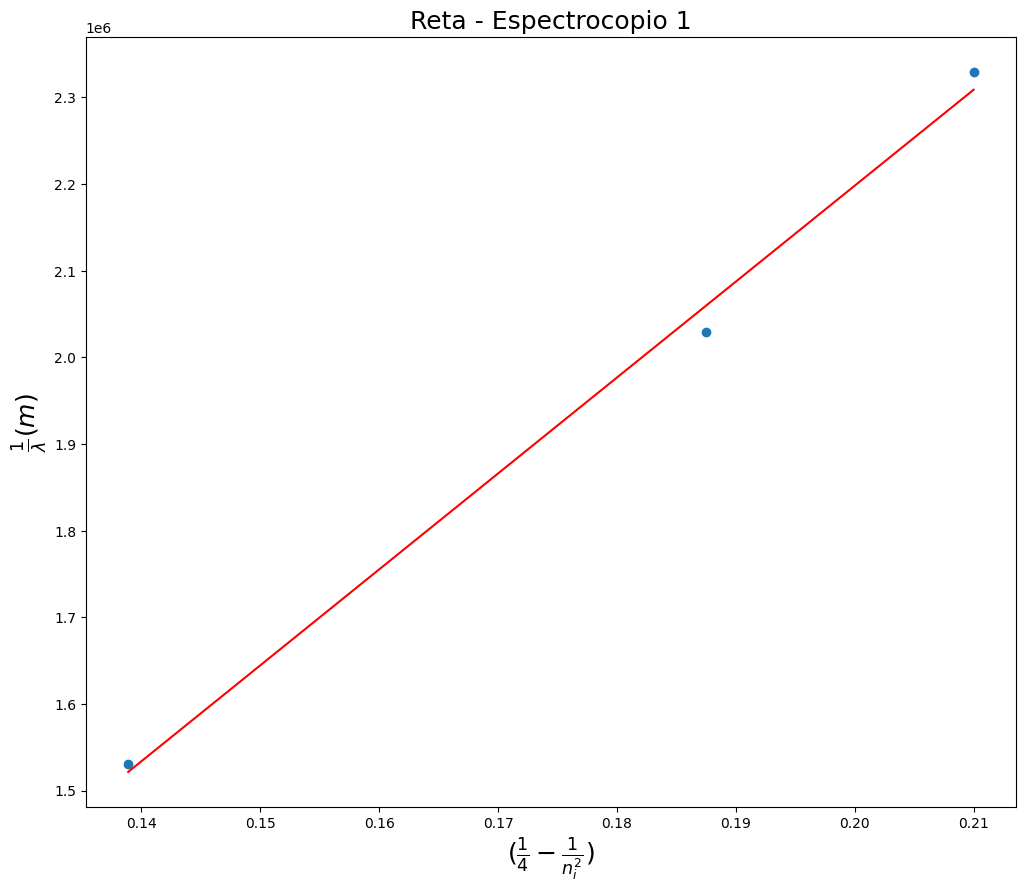

In [121]:
print("Equação da reta: y_h=",np.round(a_h,2),"*x_h +", np.round(b_h,2))
plt.figure(figsize=(12,10))
plt.plot(x_h, yhest, 'r', label = "fitted curve")
plt.scatter(x_h, y_h, label = "data")
plt.xlabel(r'$(\frac{1}{4}-\frac{1}{n_{i}^{2}})$',fontsize=18 )
plt.ylabel(r'$\frac{1}{\lambda}(m)$',fontsize=18  )
plt.title('Reta - Espectrocopio 1',fontsize=18 )
plt.show()